Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [1]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./whiskey-reviews-dspt7/train.csv')
test = pd.read_csv('./whiskey-reviews-dspt7/test.csv')
print(train.shape, test.shape)

(4087, 3) (1022, 2)


In [2]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [3]:
# Distribution of ratingCategory: 0 (Excellent), 1 (Good), 2 (Poor)
train.ratingCategory.value_counts(normalize=True)

1    0.704918
0    0.279178
2    0.015904
Name: ratingCategory, dtype: float64

In [5]:
# Read a few reviews from the "Poor" category
train[train.ratingCategory == 2].sample(3)

,id,description,ratingCategory
1667,5081,"\nAged for “at least” one month, this bourbon is a collaboration with the band Fierce Dead Rabbit. Better Days is pale gold and noticeably cloudy. On the nose it’s paste, yeasty bread dough, and wet pavement. On the palate it is all over the place with raw oak, cinnamon, almond, and black pepper. There's no balance and no integration. The finish is short, hot, and dry. As whiskey ages, it goes through odd, awkward phases, and that's where this one is.",2
1849,5037,"\nThis is new make from the Rittenhouse Rye mashbill, unaged, right off the still. Yeasty mash notes come through strongly, with a big nose of rye and corn underneath. It smells fresh, and alive. Wow, that’s powerful stuff. Much hotter than the Trybox Corn, this one is on fire with rye spice; it’s got me breaking a sweat! A bit of water brings out more grain notes, and some tempering sweetness, but it’s still no pussycat. Cleanly powerful.",2
2807,5087,"\nAged in a sherry cask, which adds sweet notes of toffee, Caribbean rum, waxed fruit, red licorice, and fruitcake to go along with the earthy smoke and lingering peat. A much sweeter, fruitier affair than the Croftengea also reviewed here, but behind all that sherry there’s still a whisky that needs a little more maturing. \r\n",2


In [6]:
from explore_data import get_num_words_per_sample 
from explore_data import plot_sample_length_distribution
from explore_data import plot_class_distribution
from explore_data import plot_frequency_distribution_of_ngrams
import seaborn as sns
sns.set()

In [7]:
median_words_per_sample = get_num_words_per_sample(train.description.values)
print(f'Median words per sample: {median_words_per_sample}')

Median words per sample: 70.0


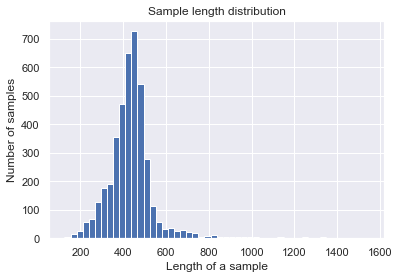

In [8]:
plot_sample_length_distribution(train.description.values)

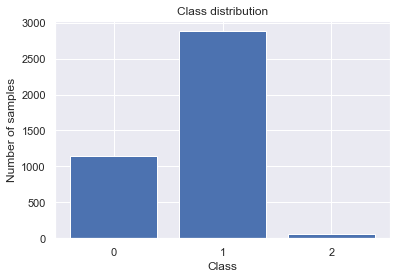

In [9]:
plot_class_distribution(train.ratingCategory.values)

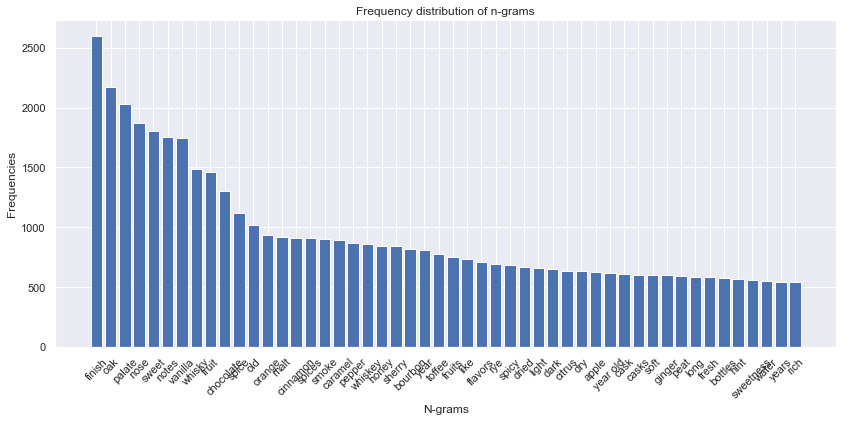

In [10]:
plot_frequency_distribution_of_ngrams(train.description.values,
                                      ngram_range=(1, 2),
                                      num_ngrams=50)

In [11]:
sw_ratio = len(train.description.values) / median_words_per_sample
print(f'Number of Samples / Median Words per Sample ratio: {int(sw_ratio)}')

Number of Samples / Median Words per Sample ratio: 58


### Split the Training Set into Train/Validation

In [12]:
from sklearn.model_selection import train_test_split

# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

X_train, X_test, y_train, y_test = train_test_split(train['description'], 
                                                    train['ratingCategory'], 
                                                    test_size=0.2, 
                                                    stratify=train['ratingCategory'],
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3269,) (818,) (3269,) (818,)


### Define Pipeline Components

In [13]:

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer



# Create Pipeline Components
vect = TfidfVectorizer(stop_words='english', 
                       ngram_range=(1,2))

#svd = TruncatedSVD(algorithm='randomized', n_iter=10)

clf = LinearSVC()
                       
rf = RandomForestClassifier()
                       
pipe = Pipeline([
    ('vect', vect), 
    ('clf', rf)
])

#pipe = Pipeline([
    #('vect', vect),      # TF-IDF Vectorizer
    #('svd', svd),        # Truncated SVD Dimensionality Reduction
    #('clf', clf)         # LinearSVC Classifier
#])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [14]:

#parameters = {
    #'vect__max_df': (0.75, 1.0),
    #'clf__max_depth':(5,10,15,20)
#}

#parameters = {
    #'vect__max_df': (0.3, 0.5),
    #'vect__min_df': (1, 2),
    #'svd__n_components': [100, 500, 5000],
    #'clf__C': (0.5, 1.)
#}

parameters = {
    'vect__max_df': (0.3, 0.5),
    #'vect__min_df': (2, 5, 10),
    #'vect__max_features': (5000, 20000),
    #'clf__penalty': ('l1','l2'),
    #'clf__C': (0.1, 0.5, 1., 2.)
}
grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(X_train, y_train)


# Fit
#random_search = RandomizedSearchCV(pipe, params, cv=2, n_iter=5, n_jobs=-1, verbose=1)
#random_search.fit(newsgroups_train.data, newsgroups_train.target)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   16.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [15]:
from sklearn.metrics import accuracy_score

y_test_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7371638141809291

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.24      0.34       228
           1       0.75      0.95      0.84       577
           2       0.00      0.00      0.00        13

    accuracy                           0.74       818
   macro avg       0.46      0.40      0.39       818
weighted avg       0.70      0.74      0.69       818



/Users/marianvinas/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import eli5

best_model = grid_search.best_estimator_
vect = best_model.named_steps['vect']
clf = best_model.named_steps['clf']

eli5.show_weights(clf, vec=vect, top=20)

/Users/marianvinas/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/marianvinas/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0037 ± 0.0110,hot
0.0035 ± 0.0112,bit
0.0035 ± 0.0118,simple
0.0030 ± 0.0108,chocolate
0.0025 ± 0.0080,mixer
0.0023 ± 0.0075,youthful
0.0022 ± 0.0069,clean
0.0022 ± 0.0072,vegetal
0.0021 ± 0.0067,corn
0.0021 ± 0.0075,spices


In [18]:
grid_search.best_params_

{'vect__max_df': 0.5}

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [19]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [20]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [21]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [22]:
subNumber = 0

In [23]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt7/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [28]:
#vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
#svd = ...
#clf = ...

#pipe = Pipeline([
    #('vect', vect),      # TF-IDF Vectorizer
    #('svd', svd),        # Truncated SVD Dimensionality Reduction
    #('clf', rfc)         # RandomForest Classifier
#])

#vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
#svm = LinearSVC()
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD

# Create Pipeline Components
vect = TfidfVectorizer(stop_words='english', 
                       ngram_range=(1,2),
                       min_df=2,
                       max_df=0.7,
                       max_features=20000)

svd = TruncatedSVD(algorithm='randomized',
                    n_iter=10)
#rf = RandomForestClassifier()
clf = LinearSVC(C=0.5,
                penalty='l2')
pipe = Pipeline([
    ('vect', vect),
    ('svd', svd), 
    ('clf', clf)
])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [31]:
parameters = {
    'svd__n_components': [10,100,250],
    'vect__max_df': (0.75, 1.0),
    #'clf__max_depth':(5,10,15,20),
   
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   49.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.7,
                                                        max_features=20000,
                                                        min_df=2,
                                                        ngram_range=(1, 2),
                                                        n

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt7/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [ ]:
# Apply to your Dataset
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint

param_dist = {
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [ ]:
# Continue Word Embedding Work Here

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = ...predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model
submission.to_csv(f'./whiskey-reviews-dspt7/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?